<a href="https://colab.research.google.com/github/decibone/PraktikumMLB1/blob/main/Tugas3_Laurentius_Lucky_PMB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Laurentius Lucky Andriawan Bagaskara

NIM: 24060122130100

Nama Dataset: Wine Dataset

Link Dataset: https://archive.ics.uci.edu/dataset/109/wine

Tugas Praktikum ML Lab B1
Pertemuan 3

Kerjakan tugas pada modul 5 & 6:
1. Lakukan agglomerative clustering untuk dataset random yang tersedia di atas dengan single linkage dan average linkage! Jelaskan perbedaannya!
2. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage dan average linkage untuk dataset cars_clustering! Jelaskan perbedaannya!
3. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage, average linkage, dan complete linkage untuk dataset masing-masing! Jelaskan perbedaannya!
4. ⁠Lakukan Principal Component Analysis untuk dataset masing-masing!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Library yang dibutuhkan
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Import Library yang dibutuhkan untuk proses Agglomerative Clustering
import scipy
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [ ]:
# Generate Random Data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)

In [ ]:
# Menampilkan dimensi generate data
X1.shape

(50, 2)

1. Lakukan agglomerative clustering untuk dataset random yang tersedia di atas dengan single linkage dan average linkage! Jelaskan perbedaannya!

Plotting random data

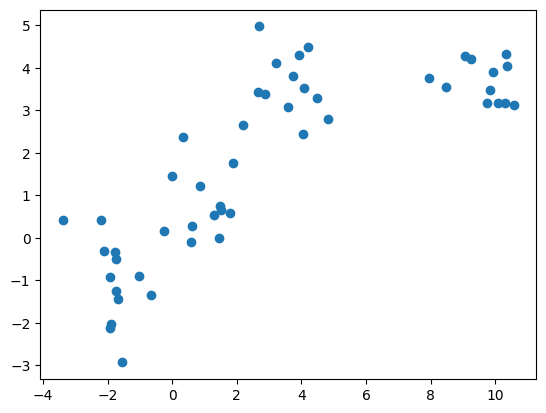

In [ ]:
# Plotting Random Data
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

Agglomerative Clustering Single Linkage

In [ ]:
# Inisialisasi objek AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 2, linkage = 'single')

# Melatih model pengelompokan pada dataset
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='single')

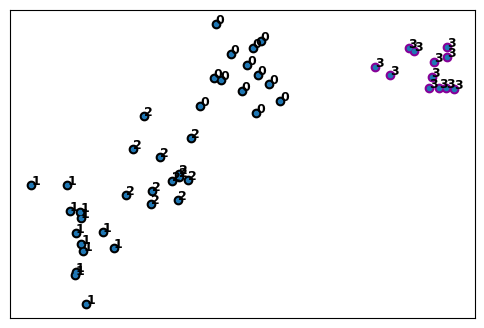

In [ ]:
# Membuat figure dengan ukuran 6, 4
plt.figure(figsize=(6,4))

# Membuat minimum dan maximum range dari X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Mencari rata-rata dari jarak X1.
X1 = (X1 - x_min) / (x_max - x_min)

# Looping untuk mendisplay semua datapoints.
for i in range(X1.shape[0]):
  # Beri warna poin poin sesuai cluster
  plt.scatter(X1[i, 0], X1[i, 1], marker='o',
              color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.))

  plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
           color='black', fontdict={'weight': 'bold', 'size': 9})

# Hapus x ticks, y ticks, x dan y axis (garis koordinat)
plt.xticks([])
plt.yticks([])

# Menampilkan plot dari data asli sebelum dicluster
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Menampilkan plot
plt.show()

Agglomerative Clustering average linkage

In [ ]:
# Inisialisasi objek AgglomerativeClustering
agglom2 = AgglomerativeClustering(n_clusters = 2, linkage = 'average')

# Melatih model pengelompokan pada dataset
agglom2.fit(X1,y1)

AgglomerativeClustering(linkage='average')

Penjelasan perbedaan: Single linkage menghitung jarak antara dua cluster berdasarkan jarak terpendek masing-masing titik dalam suatu cluster, sedangkan average linkage menghitung jarak berdarkan rata-rata jarak setiap point dalamm cluster, sehingga average linkage menghasilkan pembagian cluster yang lebih seimbang daripada single linkage, dan hal ini sangat terlihat pada plotting dimana hanya ditemukan dua cluster. Pada average linkage, pembagian cluster lebih seimbang.

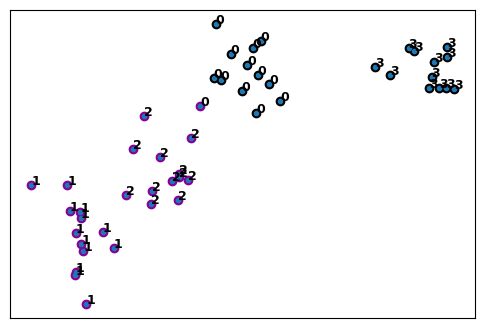

In [ ]:
# Membuat figure dengan ukuran 6, 4
plt.figure(figsize=(6,4))

# Membuat minimum dan maximum range dari X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Mencari rata-rata dari jarak X1.
X1 = (X1 - x_min) / (x_max - x_min)

# Looping untuk mendisplay semua datapoints.
for i in range(X1.shape[0]):
  # Beri warna poin poin sesuai cluster
  plt.scatter(X1[i, 0], X1[i, 1], marker='o',
              color=plt.cm.nipy_spectral(agglom2.labels_[i] / 10.))

  plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
           color='black', fontdict={'weight': 'bold', 'size': 9})

# Hapus x ticks, y ticks, x dan y axis (garis koordinat)
plt.xticks([])
plt.yticks([])

# Menampilkan plot dari data asli sebelum dicluster
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Menampilkan plot
plt.show()

2. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage dan average linkage untuk dataset cars_clustering! Jelaskan perbedaannya!

In [ ]:
# Membaca dataset dengan library panda
pdf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cars_clus.csv")

In [ ]:
# Menampilkan dimensi dataset
pdf.shape

(159, 16)

Data Cleaning

In [ ]:
# Mencetak dimensi dataset sebelum proses pembersihan
print("Dimensi dataset sebelum cleaning:", pdf.size)

# Mengubah kolom tertentu menjadi tipe data numerik, dan mengatasi nilai non-numerik dengan menggantinya menjadi NaN
pdf[['sales', 'resale', 'type','price','engine_s','horsepow','wheelbas','width',
      'length','curb_wgt','fuel_cap','mpg', 'lnsales']] = pdf[['sales', 'resale',
      'type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt',
      'fuel_cap','mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

# Menghapus baris yang mengandung nilai NaN
pdf = pdf.dropna()
# Mengatur ulang indeks setelah penghapusan baris
pdf = pdf.reset_index(drop=True)
# Mencetak dimensi dataset setelah proses pembersihan
print("Ukuran pdf setelah cleaning:", pdf.size)
# Menampilkan 10 baris pertama dari dataset yang telah dibersihkan
pdf.head(10)

Dimensi dataset sebelum cleaning: 2544
Ukuran pdf setelah cleaning: 1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0
5,Audi,A8,1.380,39.000,0.0,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,0.322,0
6,BMW,328i,9.231,28.675,0.0,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2.223,0
7,BMW,528i,17.527,36.125,0.0,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,24.8,2.864,0
8,Buick,Century,91.561,12.475,0.0,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,4.517,0
9,Buick,Regal,39.350,13.740,0.0,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,3.672,0


Feature Selection

In [ ]:
# Feature Selection
featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
featureset.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# x berisikan nilai dari featureset yang nantinya akan digunakan untuk normalisasi
x = featureset.values

# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()

# Menggunakan fit_transform untuk mengubah nilai variabel dalam rentang 0 hingga 1
feature_mtx = min_max_scaler.fit_transform(x)

# Menampilkan lima baris pertama dari hasil normalisasi
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

Clustering with Scipy

In [61]:
# Clustering with Scipy
import scipy
import pylab
import scipy.cluster.hierarchy
import numpy as np

# Mendapatkan jumlah baris (leng) dalam feature_mtx
leng = feature_mtx.shape[0]
# Inisialisasi matriks jarak D dengan nol
D = np.zeros([leng,leng])

# Menghitung jarak euclidean antara setiap pasangan data dalam feature_mtx
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

Single Linkage

In [ ]:
# Single Linkage
Z = hierarchy.linkage(D, 'single')

<ipython-input-36-b2e3cff2d09d>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'single')


In [ ]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Single Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

Single Linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Single Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 2
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters

Single Linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

Dendrogram Single Linkage

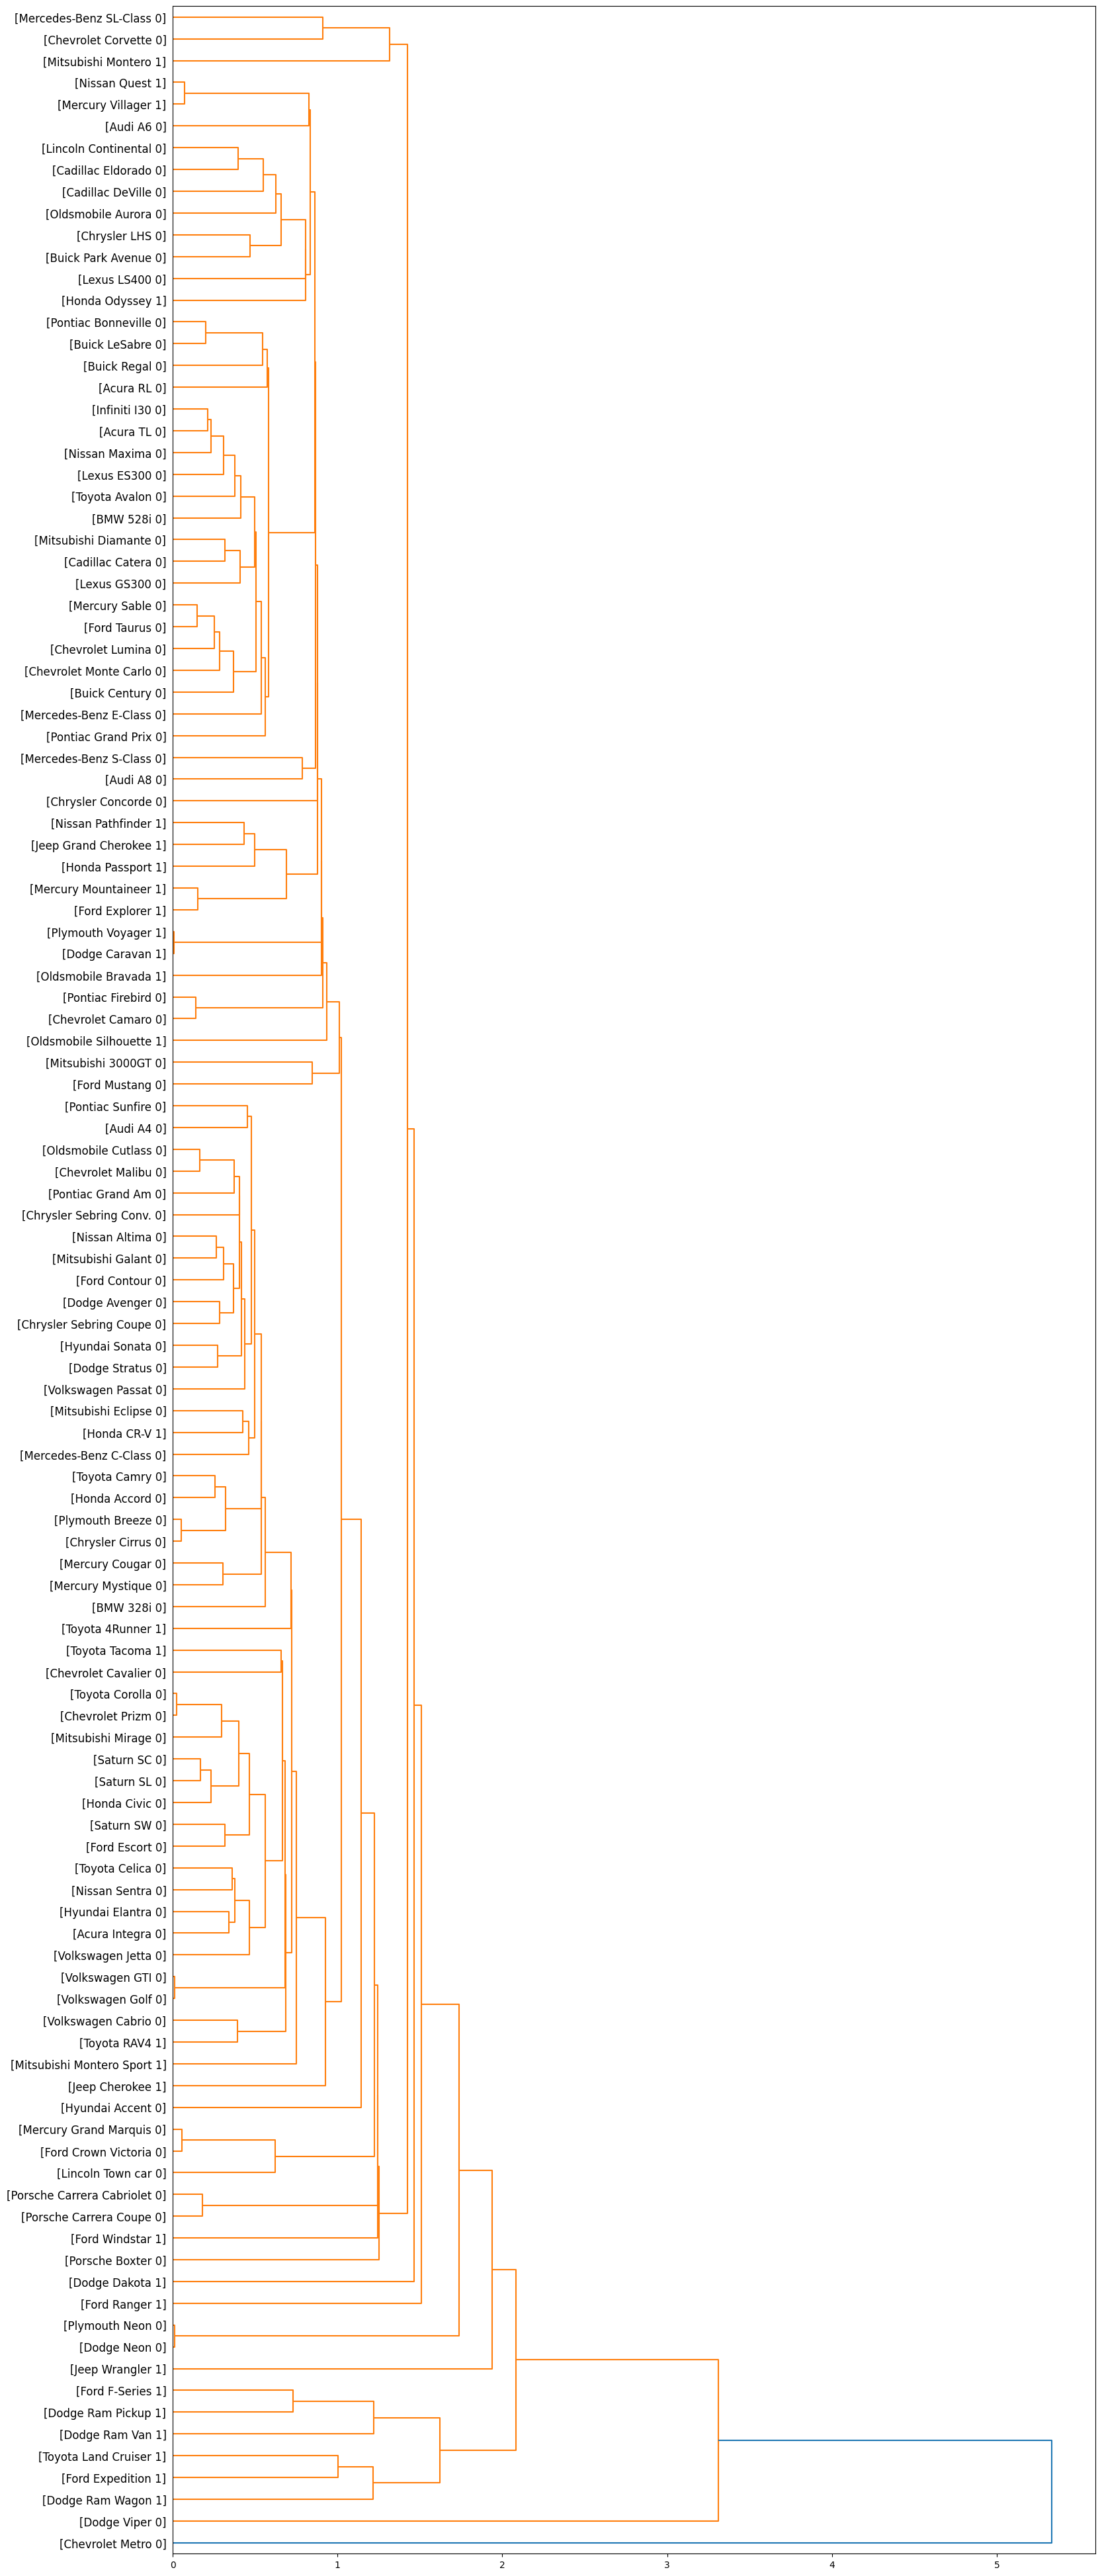

In [ ]:
# Dendrogram for simple linkage

# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id],
                         int(float(pdf['type'][id])))

# Membuat dendrogram
dendro = hierarchy.dendrogram(Z, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

Average Linkage

In [ ]:
# Average Linkage
X = hierarchy.linkage(D, 'average')

<ipython-input-40-9db1bcddfb87>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(D, 'average')


In [ ]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Average Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(X, max_d, criterion='distance')
clusters

Average Linkage


array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

In [ ]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Average Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 2
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(X, k, criterion = 'maxclust')
clusters

Average Linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

Dendrogram Average Linkage

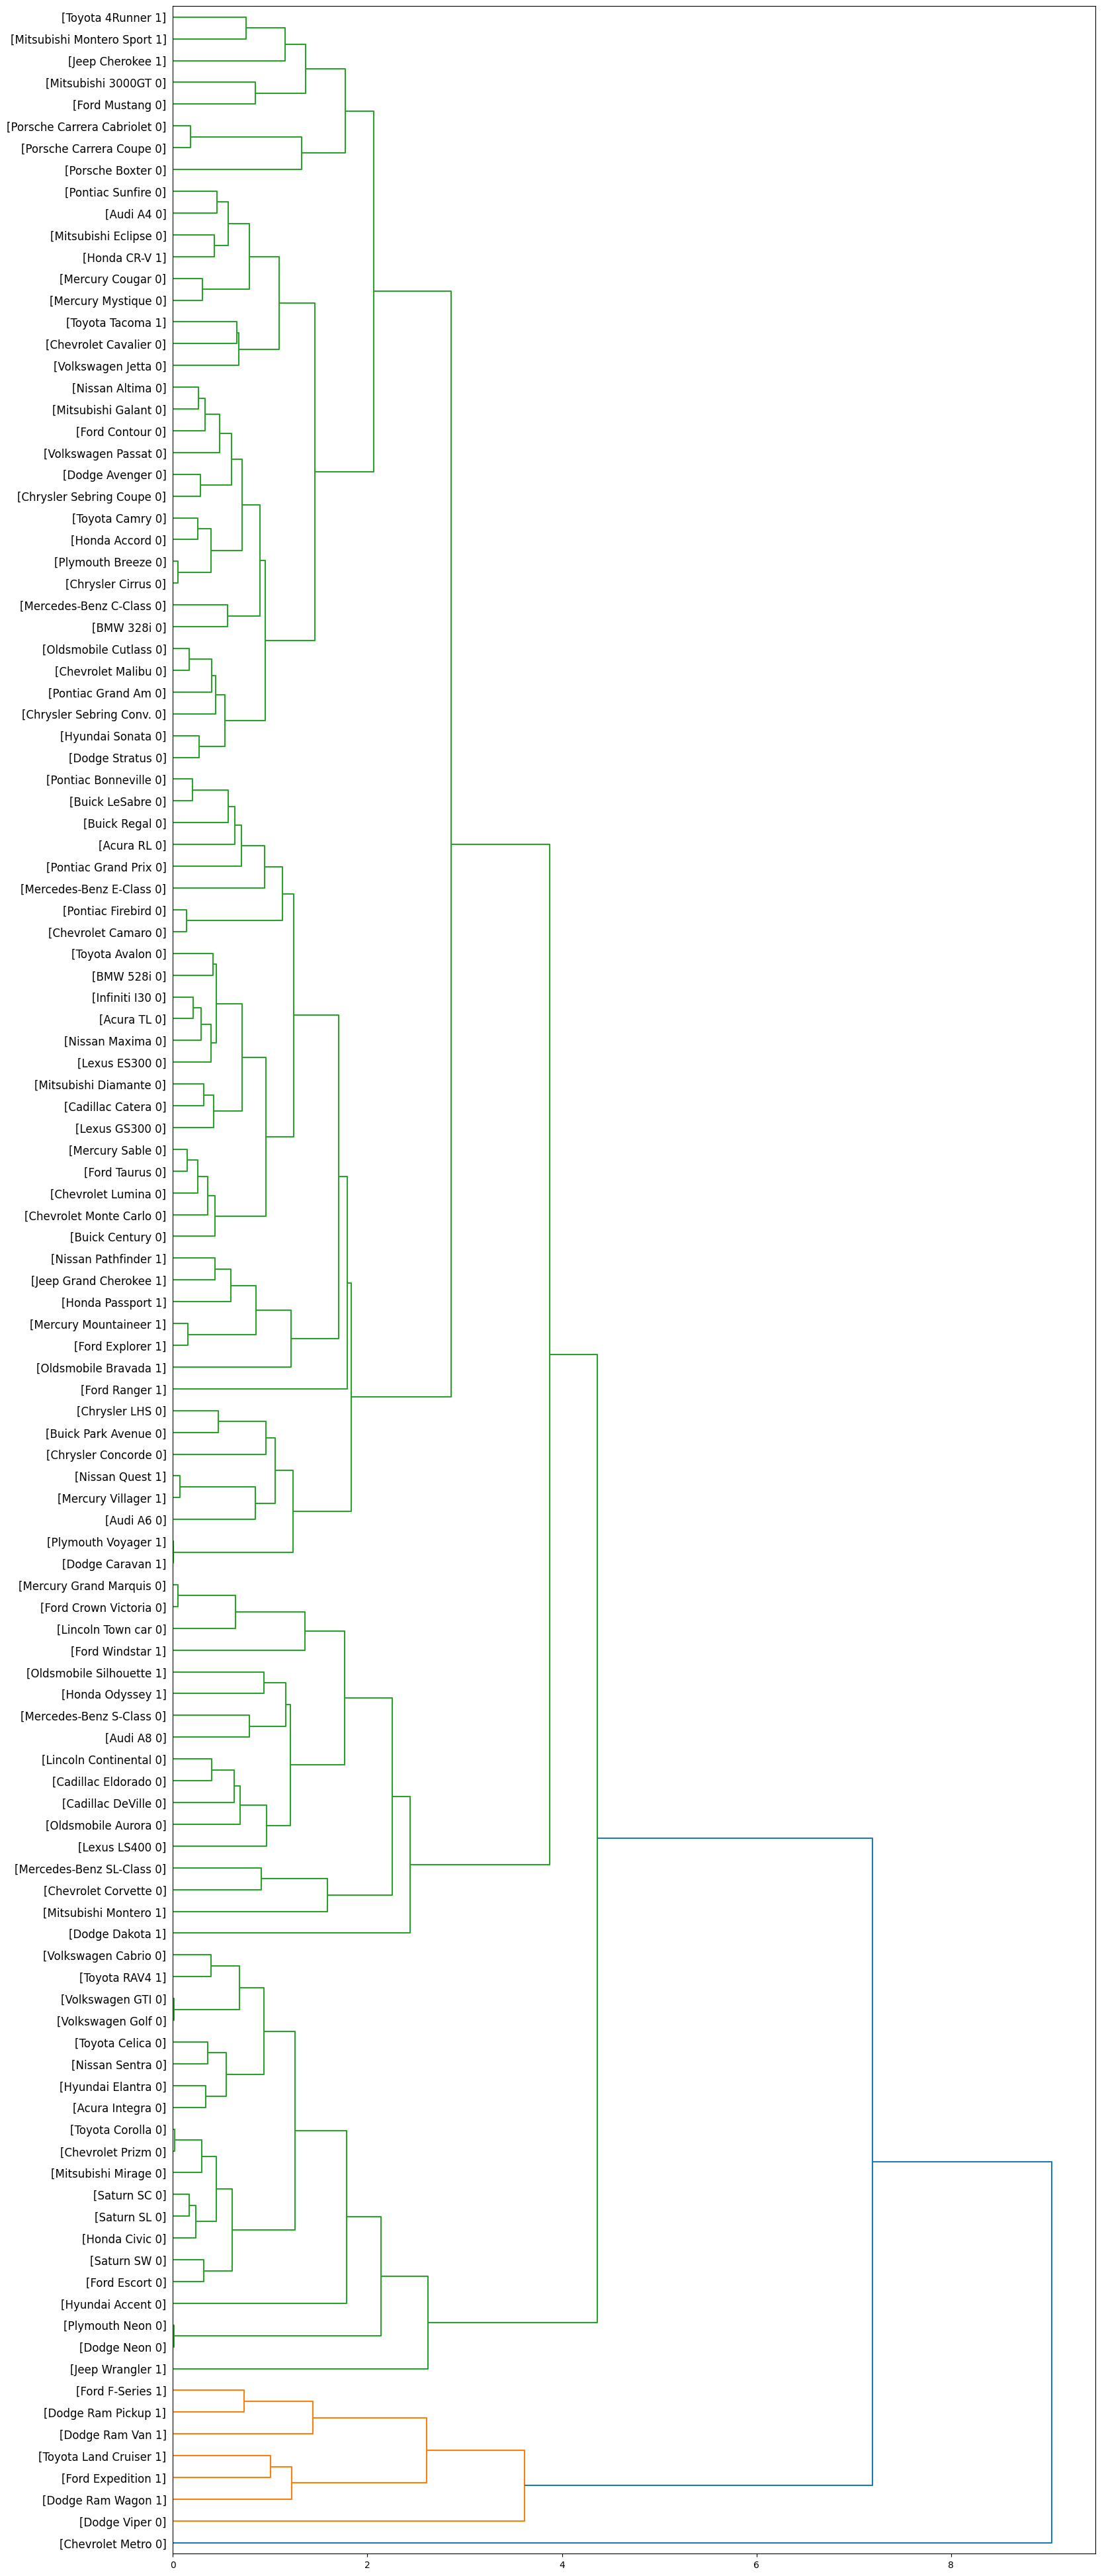

In [ ]:
# Dendrogram for average linkage

# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id],
                         int(float(pdf['type'][id])))

# Membuat dendrogram
dendro = hierarchy.dendrogram(X, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

Penjelasan perbedaan: Sama seperti sebelumnya, terdapat perbedaan yang dapat terlihat ketika melakukan clustering dengan single dan average clustering, terutama jika hanya ada 2 kluster yang diinginkan. Single linkage cenderung menghasilkan cluster yang panjang, karena outlier juga dimasukkan kedalam satu cluster, sedangkan average linkage menghasilkan bentuk cluster yang lebih teratur.

Agglom clustering dengan scilearn

In [ ]:
# Single Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'single')

# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [ ]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
pdf['cluster_'] = agglom.labels_

# Menampilkan lima baris pertama
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,0


<ipython-input-50-8d78fab03987>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

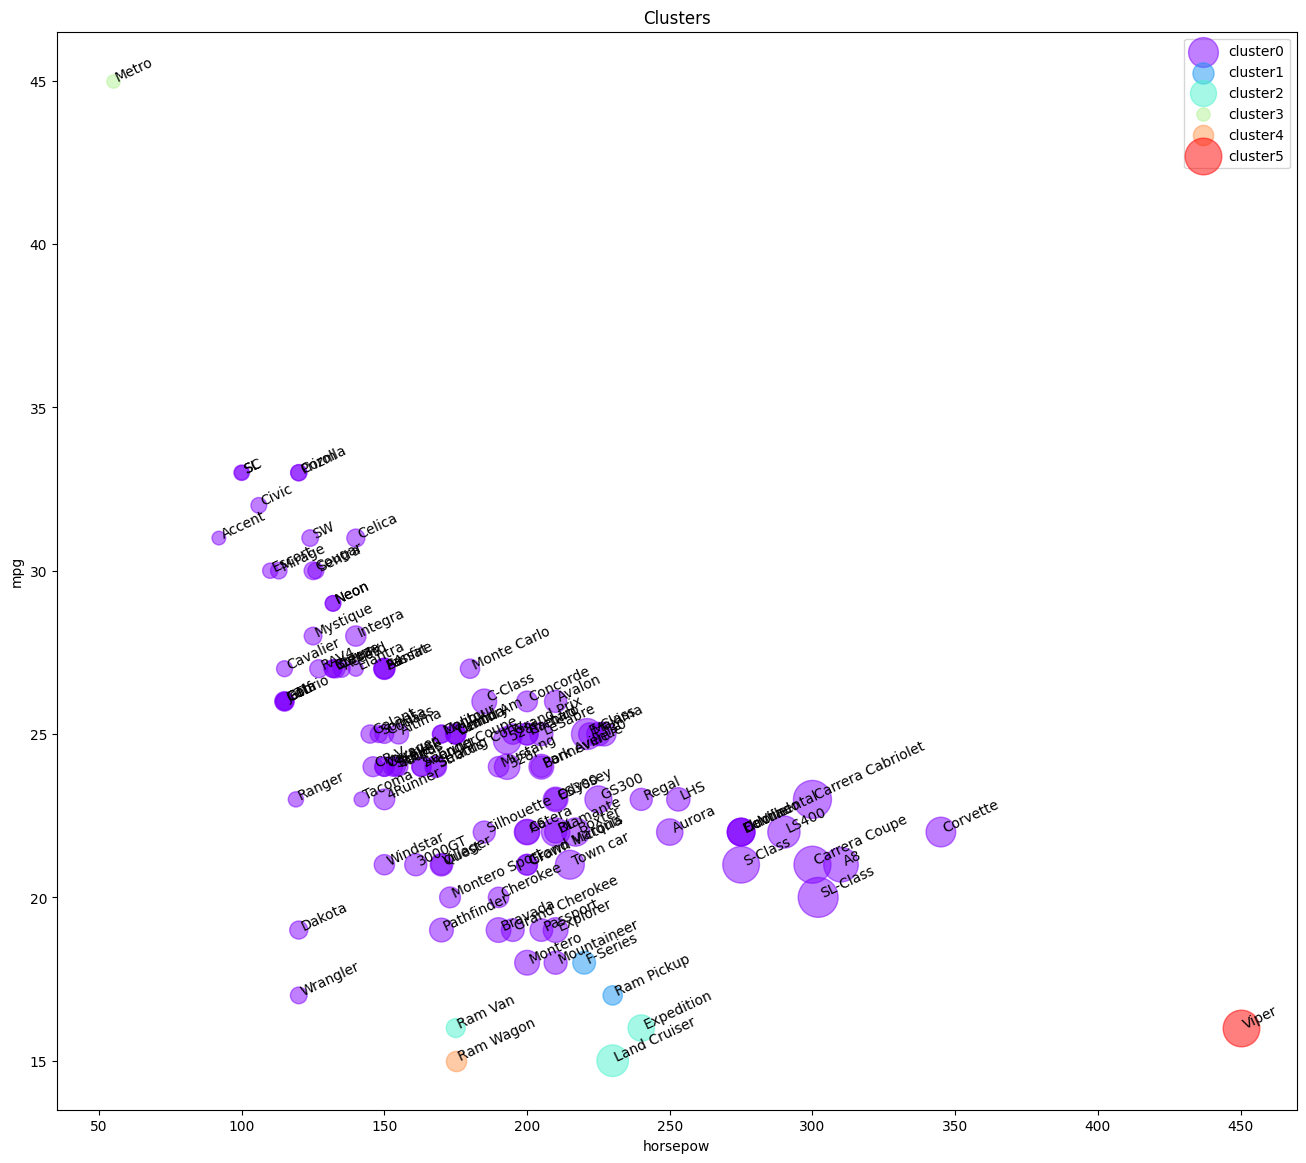

In [ ]:
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = pdf[pdf.cluster_ == label]
  for i in subset.index:
          plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Saat menggunakan single linkage kebanyakan masuk ke dalam cluster 0 dan 1

In [ ]:
# Average Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom2 = AgglomerativeClustering(n_clusters = 6, linkage = 'average')

# Melakukan clustering
agglom2.fit(feature_mtx)
agglom2.labels_

array([0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 1, 0,
       3, 0, 0, 4, 0, 4, 0, 0, 0, 1, 5, 2, 2, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       2, 4, 5, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 4, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [ ]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
pdf['cluster_'] = agglom2.labels_

# Menampilkan lima baris pertama
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,4
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,4
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,4


<ipython-input-54-76653531fa04>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

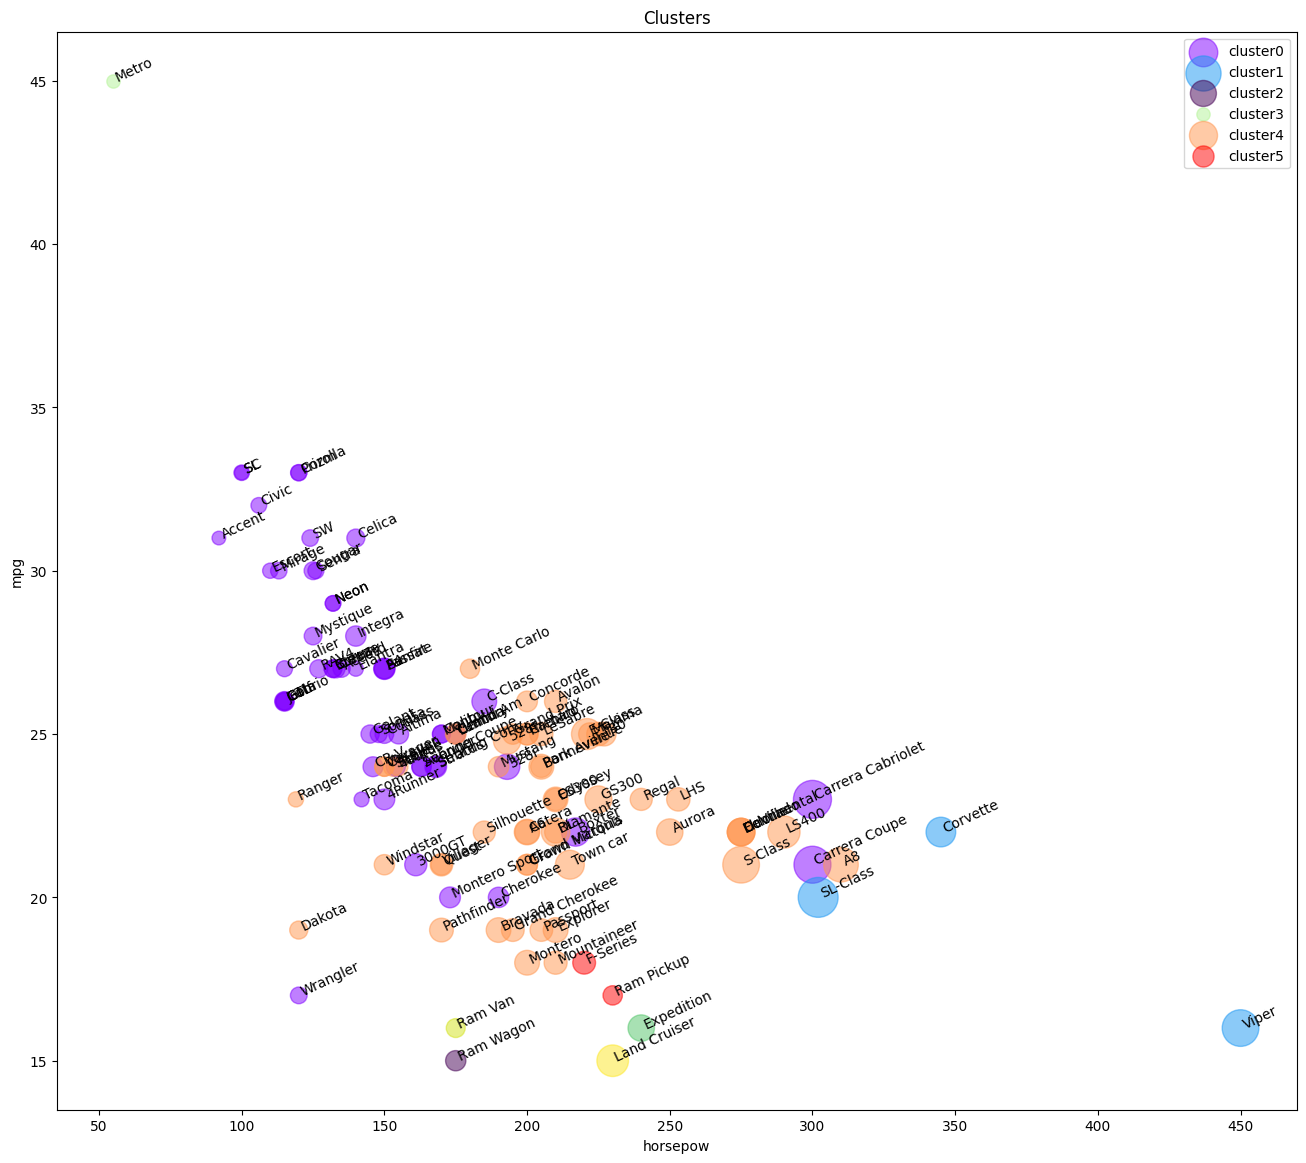

In [ ]:
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom2.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = pdf[pdf.cluster_ == label]
  for i in subset.index:
          plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Ketika menggunakan average linkage, poin-poin yang ada tersebar dengan lebih merata.

3. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage, average linkage, dan complete linkage untuk dataset masing-masing! Jelaskan perbedaannya!

In [100]:
# Import Library yang dibutuhkan
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Import Library yang dibutuhkan untuk proses Agglomerative Clustering
import scipy
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [101]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
names = ['class', 'Alcohol',  'Malicacid',  'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']

data = pd.read_csv(url, names=names)

In [102]:
# Clustering with Scipy
import scipy
import pylab
import scipy.cluster.hierarchy
import numpy as np

# Mendapatkan jumlah baris (leng) dalam feature_mtx
leng = feature_mtx.shape[0]
# Inisialisasi matriks jarak D dengan nol
D = np.zeros([leng,leng])

# Menghitung jarak euclidean antara setiap pasangan data dalam feature_mtx
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [103]:
# Mencetak dimensi dataset sebelum proses pembersihan
print("Dimensi dataset sebelum cleaning:", data.size)

# Mengubah kolom tertentu menjadi tipe data numerik, dan mengatasi nilai non-numerik dengan menggantinya menjadi NaN
data[['class', 'Alcohol',  'Malicacid',  'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']
] = data[['class', 'Alcohol',  'Malicacid',  'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']
].apply(pd.to_numeric, errors='coerce')

# Menghapus baris yang mengandung nilai NaN
data = data.dropna()
# Mengatur ulang indeks setelah penghapusan baris
data = data.reset_index(drop=True)
# Mencetak dimensi dataset setelah proses pembersihan
print("Ukuran pdf setelah cleaning:", data.size)
# Menampilkan 10 baris pertama dari dataset yang telah dibersihkan
data.head(10)

Dimensi dataset sebelum cleaning: 2492
Ukuran pdf setelah cleaning: 2492


,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [104]:
# Feature Selection
featureset2 = data[['class', 'Alcohol',  'Malicacid',  'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']
]
featureset2.head()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [105]:
from sklearn.preprocessing import MinMaxScaler

# x berisikan nilai dari featureset yang nantinya akan digunakan untuk normalisasi
x = featureset2.values

# Membuat objek MinMaxScaler
min_max_scaler2 = MinMaxScaler()

# Menggunakan fit_transform untuk mengubah nilai variabel dalam rentang 0 hingga 1
feature_mtx2 = min_max_scaler2.fit_transform(x)

# Menampilkan lima baris pertama dari hasil normalisasi
feature_mtx2[0:5]

array([[0.        , 0.84210526, 0.1916996 , 0.57219251, 0.25773196,
        0.61956522, 0.62758621, 0.57383966, 0.28301887, 0.59305994,
        0.37201365, 0.45528455, 0.97069597, 0.56134094],
       [0.        , 0.57105263, 0.2055336 , 0.4171123 , 0.03092784,
        0.32608696, 0.57586207, 0.51054852, 0.24528302, 0.27444795,
        0.26450512, 0.46341463, 0.78021978, 0.55064194],
       [0.        , 0.56052632, 0.3201581 , 0.70053476, 0.41237113,
        0.33695652, 0.62758621, 0.61181435, 0.32075472, 0.75709779,
        0.37542662, 0.44715447, 0.6959707 , 0.64693295],
       [0.        , 0.87894737, 0.23913043, 0.60962567, 0.31958763,
        0.4673913 , 0.98965517, 0.66455696, 0.20754717, 0.55835962,
        0.55631399, 0.30894309, 0.7985348 , 0.85734665],
       [0.        , 0.58157895, 0.36561265, 0.80748663, 0.53608247,
        0.52173913, 0.62758621, 0.49578059, 0.49056604, 0.44479495,
        0.25938567, 0.45528455, 0.60805861, 0.32596291]])

In [106]:
# Clustering with Scipy
import scipy
import pylab
import scipy.cluster.hierarchy
import numpy as np

# Mendapatkan jumlah baris (leng) dalam feature_mtx
leng2 = feature_mtx2.shape[0]
# Inisialisasi matriks jarak D dengan nol
D = np.zeros([leng2,leng2])

# Menghitung jarak euclidean antara setiap pasangan data dalam feature_mtx
for i in range(leng2):
  for j in range(leng2):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx2[i], feature_mtx2[j])

In [107]:
# Single Linkage
A = hierarchy.linkage(D, 'single')

<ipython-input-107-6272a19ea9d8>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  A = hierarchy.linkage(D, 'single')


In [108]:
# Single Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'single')

# Melakukan clustering
agglom.fit(feature_mtx2)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [109]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("single linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(A, max_d, criterion='distance')
clusters

single linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [110]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame
data['cluster_'] = agglom.labels_

# Menampilkan lima baris pertama
data.head()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,cluster_
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


<ipython-input-111-9c755fb4a745>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Alcohol, subset.Total_phenols, s=subset.Magnesium * 10, c=color, label='cluster' + str(label), alpha=0.5)
<ipython-input-111-9c755fb4a745>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Alcohol, subset.Total_phenols, s=subset.Magnesium * 10, c=color, label='cluster' + str(label), alpha=0.5)
<ipython-inp

Text(0, 0.5, 'Total_phenols')

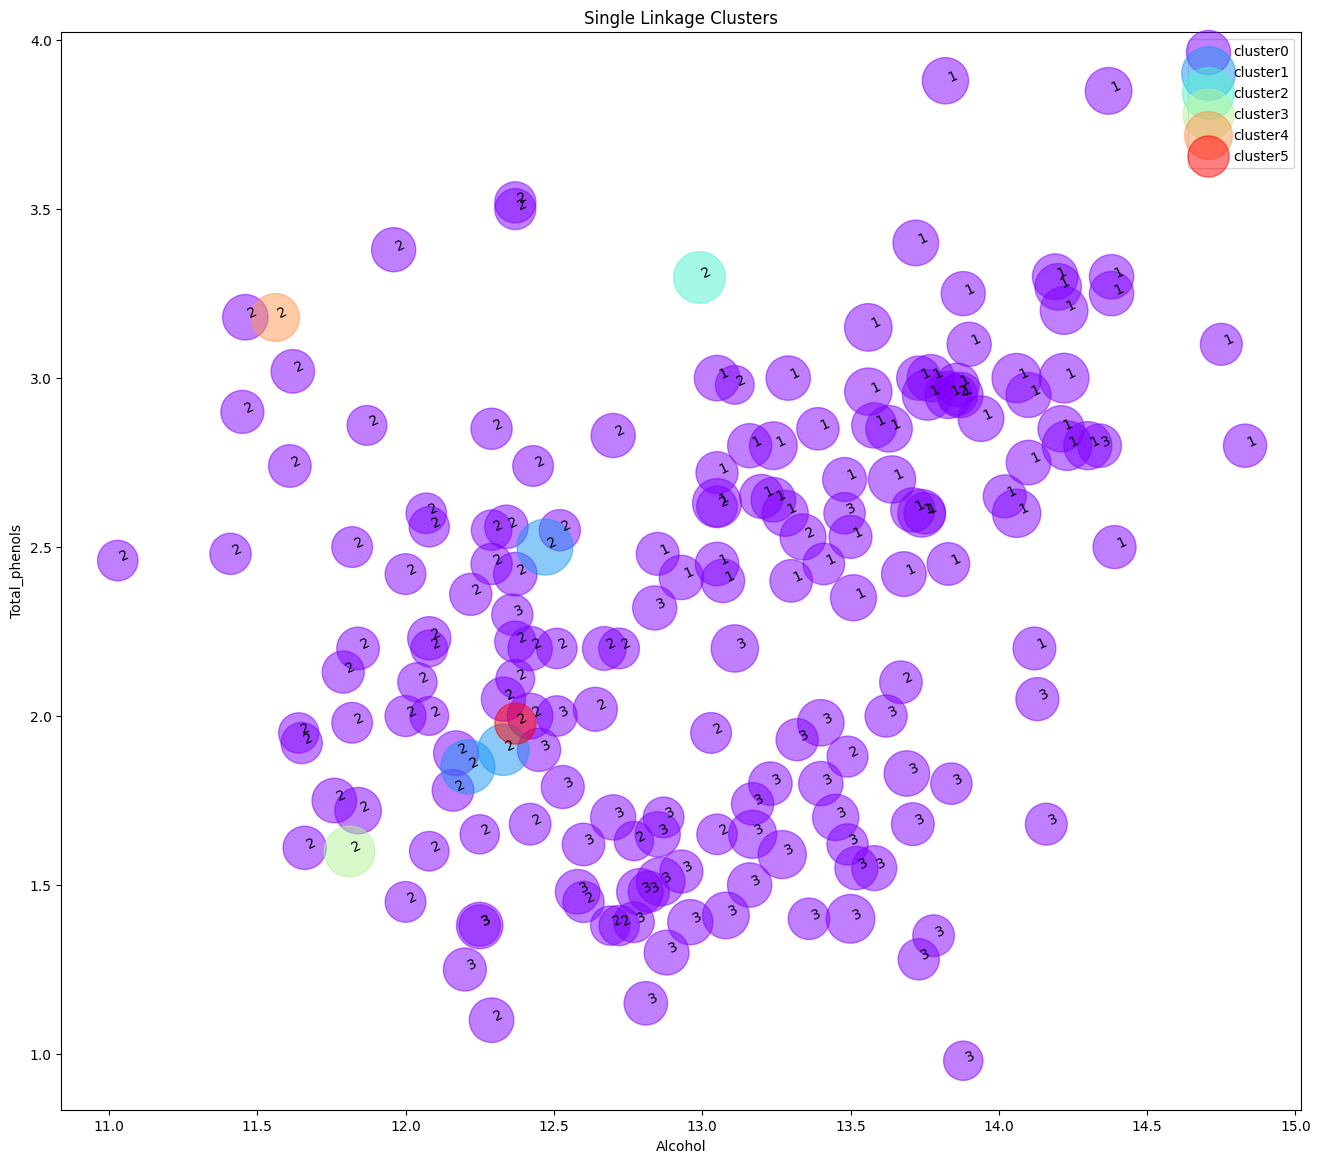

In [111]:
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16, 14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
    subset = data[data.cluster_ == label]
    # Replace 'horsepow' with 'Alcohol', 'mpg' with 'Total_phenols'
    # and adjust the text annotation accordingly
    for i in subset.index:
        plt.text(subset.Alcohol[i], subset.Total_phenols[i], str(subset['class'][i]), rotation=25)
    plt.scatter(subset.Alcohol, subset.Total_phenols, s=subset.Magnesium * 10, c=color, label='cluster' + str(label), alpha=0.5)
    # Replace 'horsepow' with 'Alcohol', 'mpg' with 'Total_phenols',
    # 'price' with 'Magnesium' in the scatter plot

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Single Linkage Clusters')
plt.xlabel('Alcohol')  # Replace 'horsepow' with 'Alcohol'
plt.ylabel('Total_phenols')  # Replace 'mpg' with 'Total_phenols'

Average Linkage

In [112]:
# Average Linkage
B = hierarchy.linkage(D, 'average')

<ipython-input-112-5941ea8a097b>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  B = hierarchy.linkage(D, 'average')


In [113]:
# Average Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'average')

# Melakukan clustering
agglom.fit(feature_mtx2)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [114]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("average linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(B, max_d, criterion='distance')
clusters

average linkage


array([ 5,  5,  5,  3,  5,  5,  5,  5,  5,  5,  5,  5,  5,  3,  3,  5,  5,
        5,  3,  5,  5,  5,  5,  5,  5,  4,  5,  5,  5,  5,  5,  5,  5,  4,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5, 10,  6,  6,  9,  8,  6,  9,  8,  9,
        6, 13,  6,  8,  9, 13,  8,  6,  9,  6,  7,  9,  9,  9,  9,  6,  9,
        9,  6,  9,  6,  9,  6,  6,  6,  9,  9, 13,  7,  9,  8,  9,  9,  9,
        9,  9,  9,  6,  9,  6,  9,  9, 12,  9,  6,  9,  9, 11,  9,  9,  6,
        9,  9, 14,  6, 12, 12,  9,  9,  6,  9,  6,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int32)

In [115]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame
data['cluster_'] = agglom.labels_

# Menampilkan lima baris pertama
data.head()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,cluster_
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


<ipython-input-116-97d80df1763c>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Alcohol, subset.Total_phenols, s=subset.Magnesium * 10, c=color, label='cluster' + str(label), alpha=0.5)
<ipython-input-116-97d80df1763c>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Alcohol, subset.Total_phenols, s=subset.Magnesium * 10, c=color, label='cluster' + str(label), alpha=0.5)
<ipython-inp

Text(0, 0.5, 'Total_phenols')

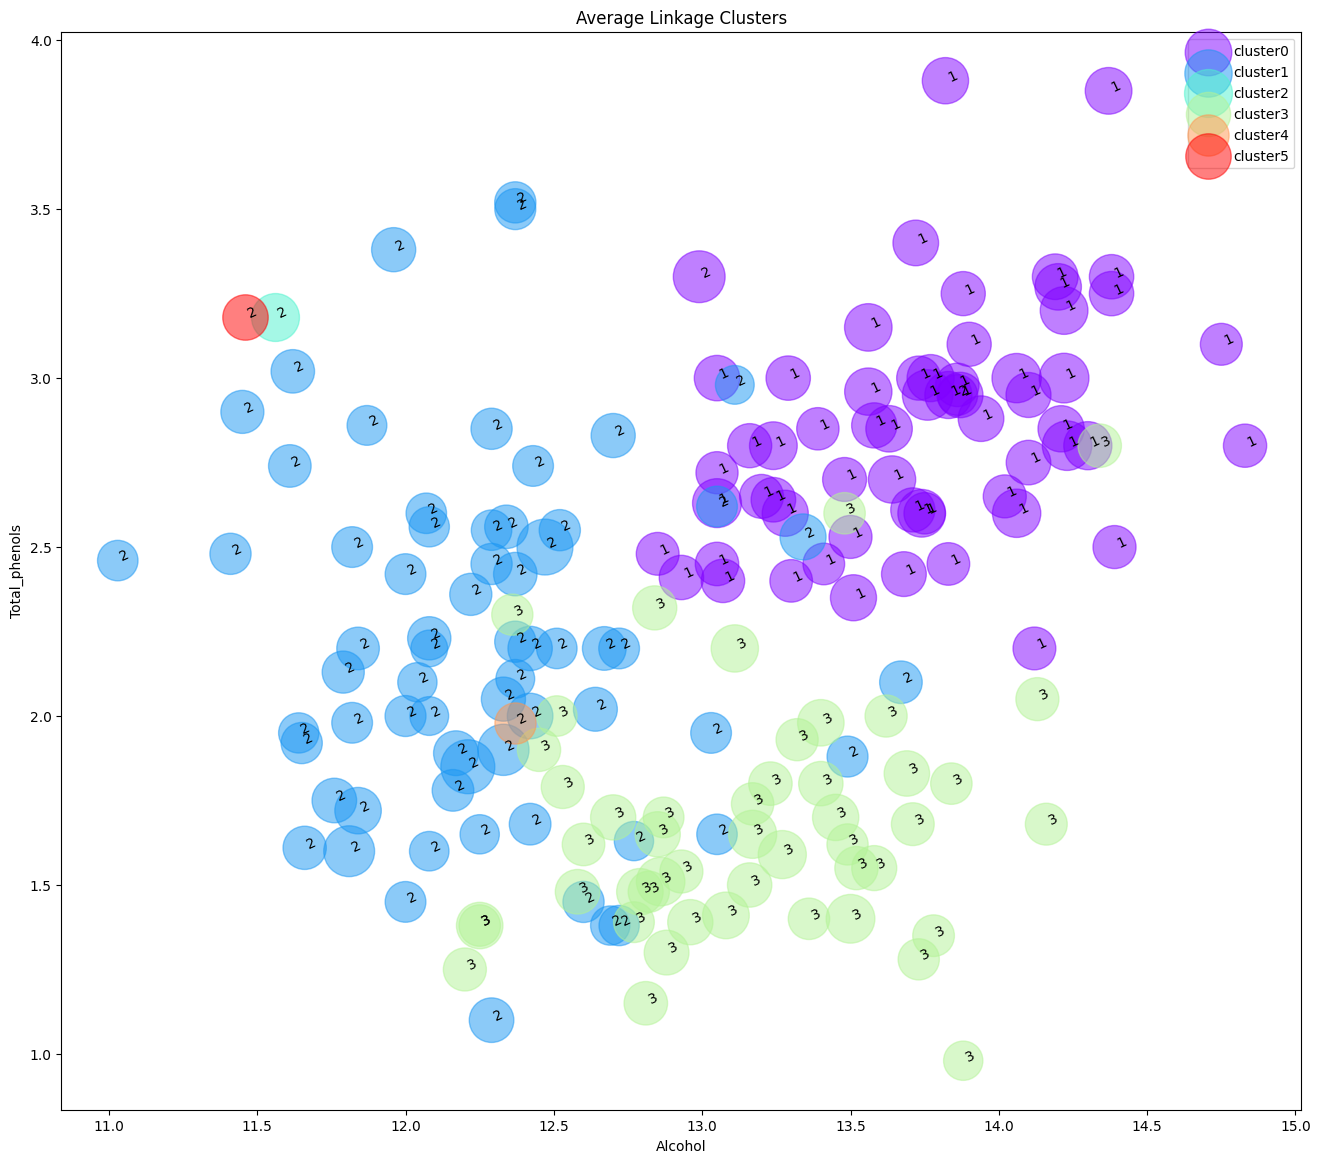

In [116]:
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16, 14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
    subset = data[data.cluster_ == label]
    # Replace 'horsepow' with 'Alcohol', 'mpg' with 'Total_phenols'
    # and adjust the text annotation accordingly
    for i in subset.index:
        plt.text(subset.Alcohol[i], subset.Total_phenols[i], str(subset['class'][i]), rotation=25)
    plt.scatter(subset.Alcohol, subset.Total_phenols, s=subset.Magnesium * 10, c=color, label='cluster' + str(label), alpha=0.5)
    # Replace 'horsepow' with 'Alcohol', 'mpg' with 'Total_phenols',
    # 'price' with 'Magnesium' in the scatter plot

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Average Linkage Clusters')
plt.xlabel('Alcohol')  # Replace 'horsepow' with 'Alcohol'
plt.ylabel('Total_phenols')  # Replace 'mpg' with 'Total_phenols'

Complete Linkage

In [117]:
# Complete Linkage
C = hierarchy.linkage(D, 'complete')

<ipython-input-117-9ee2dd08f0b0>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  C = hierarchy.linkage(D, 'complete')


In [118]:
# complete Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')

# Melakukan clustering
agglom.fit(feature_mtx2)
agglom.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 4, 1, 4, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5,
       5, 5, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 5, 5, 5, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 5, 2, 0, 0, 0, 0, 0,
       0, 0])

In [119]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("complete linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(C, max_d, criterion='distance')
clusters

complete linkage


array([26, 23, 23, 24, 22, 26, 26, 23, 26, 23, 26, 23, 23, 24, 24, 26, 26,
       26, 24, 25, 26, 22, 23, 23, 23, 20, 23, 22, 23, 23, 26, 26, 22, 26,
       22, 23, 22, 22, 22, 25, 23, 22, 26, 22, 23, 25, 26, 23, 23, 26, 24,
       26, 26, 26, 23, 23, 23, 23, 26,  9, 11, 11, 16,  7, 14,  6,  7,  8,
       11, 18, 13,  7,  6, 20,  7, 16, 16, 13, 17,  8,  8,  6, 14, 12,  8,
        6, 14, 14, 14, 14, 13, 13, 13,  8,  8, 18, 17,  8,  7,  8,  8, 16,
        6, 16,  6, 15,  6, 13,  6,  8, 19,  6, 15, 14,  6, 10,  6,  6, 12,
        6,  8, 21, 15, 19, 19,  6,  6, 15,  6, 13,  5,  5,  5,  5,  3,  3,
        2,  2,  3,  3,  3,  3,  3,  3,  5,  3,  2,  2,  4,  4,  5,  5,  5,
        2,  3,  2,  2,  2,  1,  1,  3,  3,  3,  3,  4,  2,  4,  4,  4,  4,
        3,  2,  4,  2,  4,  4,  4,  2], dtype=int32)

In [120]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame
data['cluster_'] = agglom.labels_

# Menampilkan lima baris pertama
data.head()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,cluster_
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3


<ipython-input-121-74a291985ee1>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Alcohol, subset.Total_phenols, s=subset.Magnesium * 10, c=color, label='cluster' + str(label), alpha=0.5)
<ipython-input-121-74a291985ee1>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Alcohol, subset.Total_phenols, s=subset.Magnesium * 10, c=color, label='cluster' + str(label), alpha=0.5)
<ipython-inp

Text(0, 0.5, 'Total_phenols')

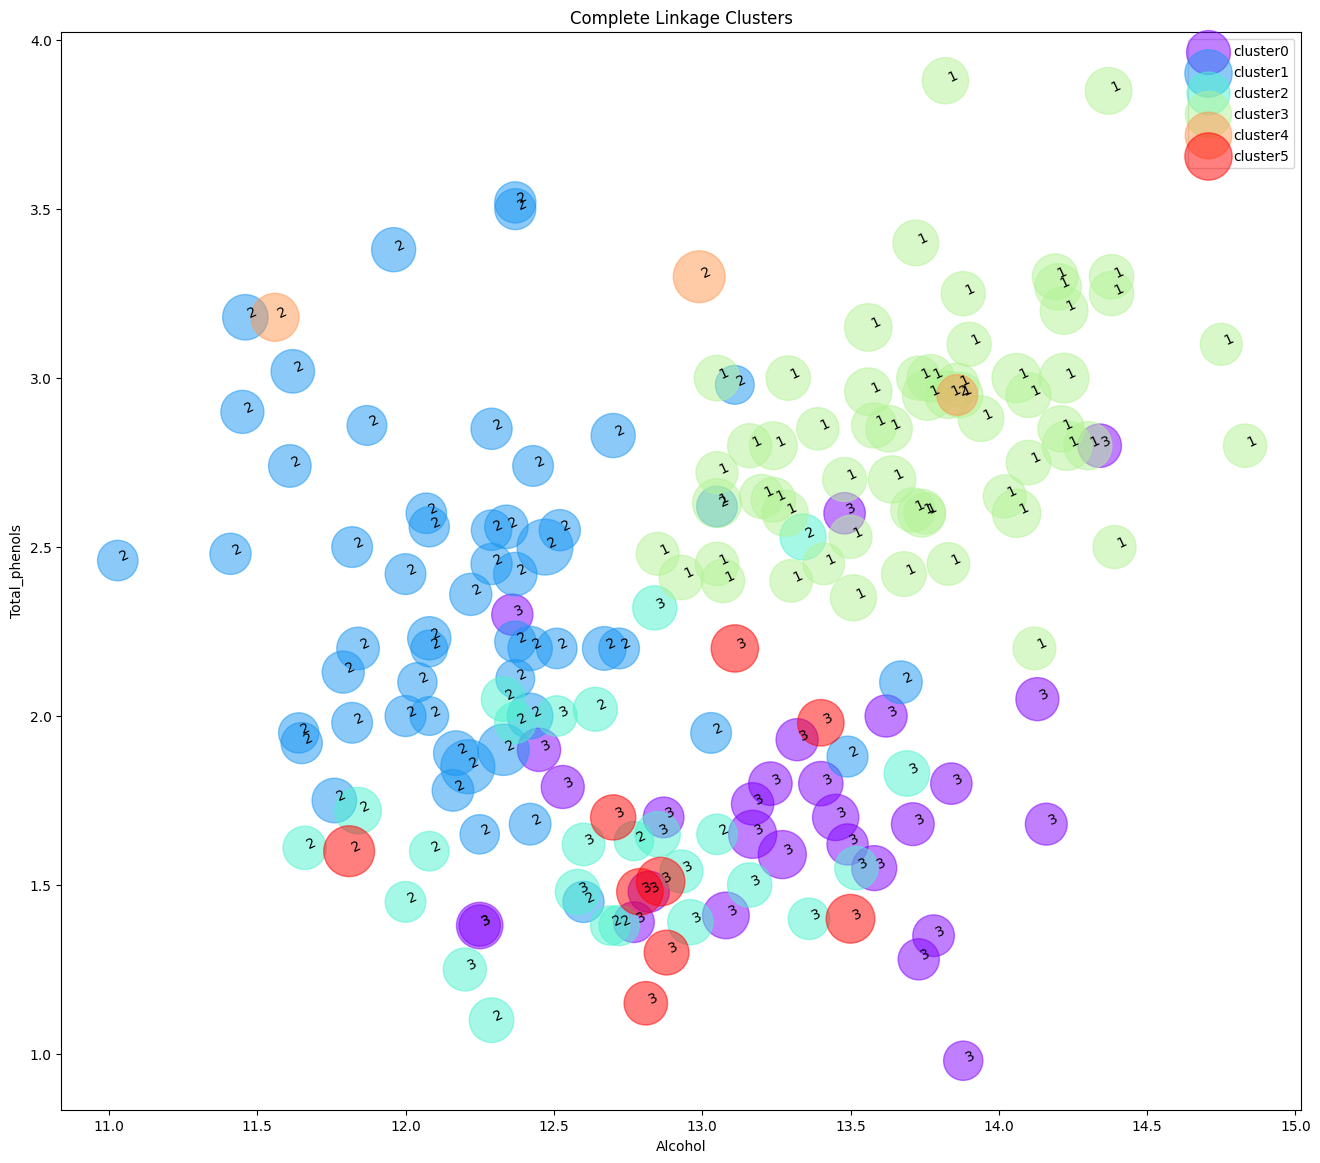

In [121]:
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16, 14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
    subset = data[data.cluster_ == label]
    # Replace 'horsepow' with 'Alcohol', 'mpg' with 'Total_phenols'
    # and adjust the text annotation accordingly
    for i in subset.index:
        plt.text(subset.Alcohol[i], subset.Total_phenols[i], str(subset['class'][i]), rotation=25)
    plt.scatter(subset.Alcohol, subset.Total_phenols, s=subset.Magnesium * 10, c=color, label='cluster' + str(label), alpha=0.5)
    # Replace 'horsepow' with 'Alcohol', 'mpg' with 'Total_phenols',
    # 'price' with 'Magnesium' in the scatter plot

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Complete Linkage Clusters')
plt.xlabel('Alcohol')  # Replace 'horsepow' with 'Alcohol'
plt.ylabel('Total_phenols')  # Replace 'mpg' with 'Total_phenols'

Perbedaan antara single, average, dan complete linkage untuk dataset wine adalah, pada single linkage, sebagian besar data masuk pada cluster 0 atau 1. Average linkage dan complete linkage lebih menyebarkan data data secara merata. Complete linkage menyebarkan data secara lebih ketat lagi dibandingkan dengan average linkage.

4. ⁠Lakukan Principal Component Analysis untuk dataset masing-masing!


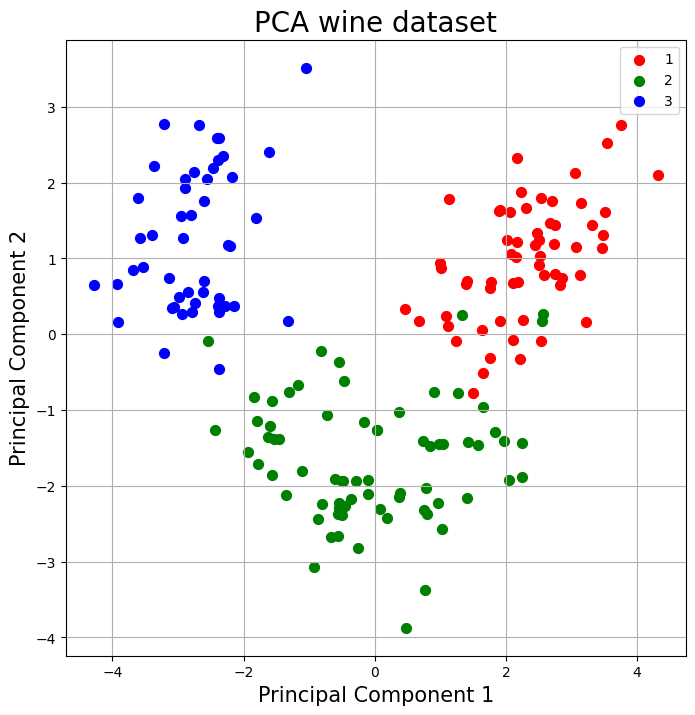

array([0.36198848, 0.1920749 ])

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
            'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
            'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']

x = data.loc[:, features].values
y = data.loc[:, ['class']].values

# Standarisasi fitur
x = StandardScaler().fit_transform(x)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Gabungkan hasil PCS dengan target variabel
finalDf = pd.concat([principalDf, data[['class']]], axis=1)

# Visualisasi hasil
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('PCA wine dataset', fontsize=20)

targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color, s=50)
ax.legend(targets)
ax.grid()
plt.show()

pca.explained_variance_ratio_

Penjelasan:
Pemisahan antarkelas: Ketiga kelas anggur (1, 2, dan 3) tampaknya cukup terpisah dalam ruang PCA, menunjukkan bahwa dua komponen utama pertama mampu menangkap beberapa perbedaan mendasar antara jenis-jenis anggur.

Pengelompokan dalam kelas: Dalam setiap kelas anggur, terdapat kluster-kluster sampel yang saling berdekatan, menunjukkan bahwa anggur-anggur dalam satu kelas memiliki karakteristik yang serupa.

Wilayah tumpang-tindih: Meskipun kelas-kelas umumnya terpisah, ada beberapa wilayah di mana kelas-kelas saling tumpang-tindih, menunjukkan bahwa anggur-anggur di daerah tersebut memiliki sifat yang lebih mirip lintas kelas.

Outlier: Terdapat beberapa titik data outlier, terutama dalam kelas anggur 3, yang jauh dari kluster utama. Outlier ini mungkin mewakili anggur-anggur dengan sifat unik atau tidak biasa dibandingkan dengan mayoritas sampel dalam kelas masing-masing.